In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data-LB\Machine Learning\New folder\student_scores.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


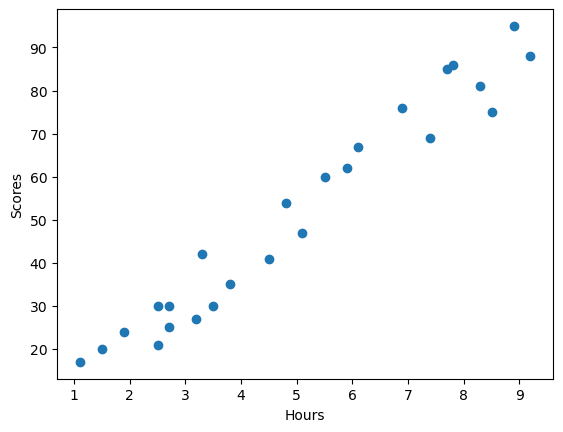

In [5]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
from sklearn.model_selection import train_test_split

In [11]:
y = df['Scores'].values.reshape(-1,1)
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [12]:
x = df['Hours'].values.reshape(-1,1)
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

x = feature

y = target

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [36]:
x_train

array([[3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [37]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3],
       [5.1]])

In [38]:
y_train

array([[35],
       [20],
       [27],
       [41],
       [95],
       [75],
       [30],
       [30],
       [24],
       [54],
       [67],
       [86],
       [60],
       [85],
       [17],
       [69],
       [88]], dtype=int64)

In [39]:
y_test

array([[81],
       [30],
       [21],
       [76],
       [62],
       [25],
       [42],
       [47]], dtype=int64)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
reg = LinearRegression()

In [42]:
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
reg.intercept_

array([2.79419668])

In [44]:
reg.coef_

array([[9.71054094]])

In [45]:
def cal(slope,intercept,hour):
    return slope*hour + intercept

In [48]:
score = cal(reg.coef_,reg.intercept_,9.2)
print(score)

[[92.13117329]]


In [49]:
y_pred = reg.predict(x_test)

In [50]:
y_pred

array([[83.39168645],
       [27.07054902],
       [27.07054902],
       [69.79692914],
       [60.0863882 ],
       [29.0126572 ],
       [34.83898177],
       [52.31795545]])

In [55]:
df_pred = pd.DataFrame({'Hour':x_test.squeeze(),'Actual':y_test.squeeze(),'Predicted':y_pred.squeeze()})

In [56]:
df_pred

,Hour,Actual,Predicted
0,8.3,81,83.391686
1,2.5,30,27.070549
2,2.5,21,27.070549
3,6.9,76,69.796929
4,5.9,62,60.086388
5,2.7,25,29.012657
6,3.3,42,34.838982
7,5.1,47,52.317955


In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [59]:
mae = mean_absolute_error(y_test,y_pred)
mae

4.499999999999998

In [60]:
mse = mean_squared_error(y_test,y_pred)

In [61]:
mse

23.61945761415174

In [62]:
rsme = np.sqrt(mse)
rsme

4.859985351228103